In [1]:

import pandas as pd
import sys
sys.path.append("..")  # 添加上级目录

from config.contract_margin import contract_margin_ratio
from config.contract_multiplier import contract_multipliers
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  # 字号，你可以调大调小

history=pd.read_csv("../data/9999_1m_0708v3_backtest.csv")
history['datetime'] = pd.to_datetime(history['datetime'])
history=history[(history['datetime'].dt.month>=12)&((history['datetime'].dt.day>=15))]

history.columns=['datetime', 'instrument', 'open', 'close', 'high', 'low', 'volume', 'money',
       'avg', 'high_limit', 'low_limit', 'paused', 'factor', 'open_interest',
       'contract', 'change', 'vwap', 'preclose']

import pandas as pd
df = pd.read_csv("../experiments/transformer_final/test_predictions_final.csv")
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
merged_df = pd.merge(
    df,
    history,
    on=['datetime', 'instrument'],  # 按这两列合并
    how='inner'  # 合并方式：inner/outer/left/right
)

merged_df['Multiplier'] = merged_df['instrument'].map(contract_multipliers)
merged_df['Margin_ratio'] = merged_df['instrument'].map(contract_margin_ratio)

      contract direction          entry_time  entry_price           exit_time  \
0  EC9999.XINE      long 2024-12-16 09:48:00  2479.026121 2024-12-16 09:52:00   
1  EC9999.XINE     short 2024-12-16 09:54:00  2496.496396 2024-12-16 09:58:00   
2  EC9999.XINE     short 2024-12-16 10:55:00  2552.408511 2024-12-16 10:59:00   
3  EC9999.XINE      long 2024-12-16 14:28:00  2572.235833 2024-12-16 14:32:00   
4  EC9999.XINE     short 2024-12-16 14:36:00  2597.817125 2024-12-16 14:40:00   

    exit_price    return     gross_pnl         fee       net_pnl  \
0  2497.440773  0.007428  12337.816277  333.423282  12004.392995   
1  2512.366310 -0.006357 -10474.143084  330.584939 -10804.728023   
2  2537.516981  0.005834   9679.494179  330.845157   9348.649022   
3  2590.687402  0.007173  11809.003675  330.427087  11478.576588   
4  2616.497784 -0.007191 -11955.621830  333.716154 -12289.337984   

          margin  position_size  
0  199313.700158             67  
1  197722.514595             66  
2 

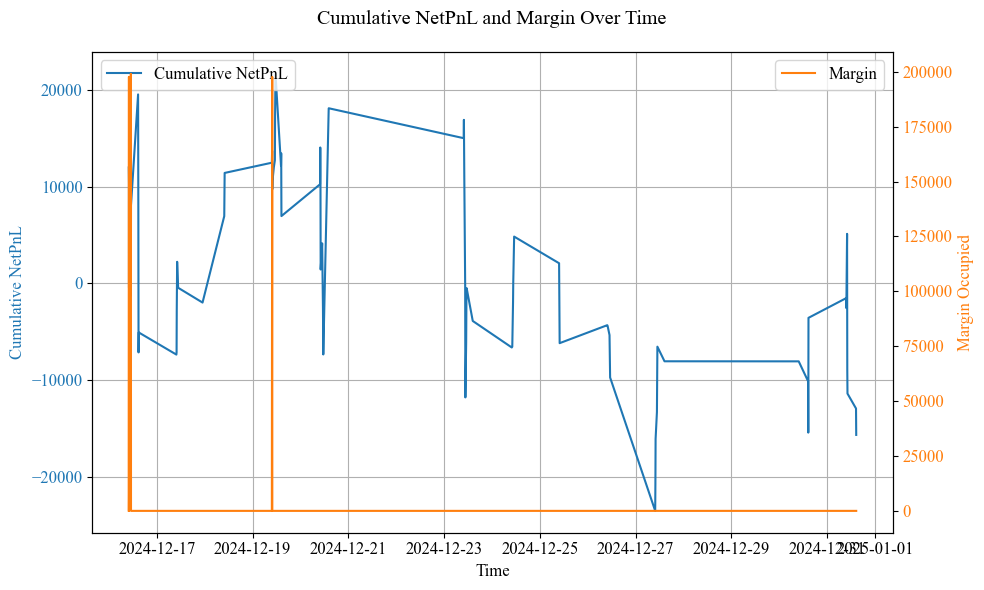

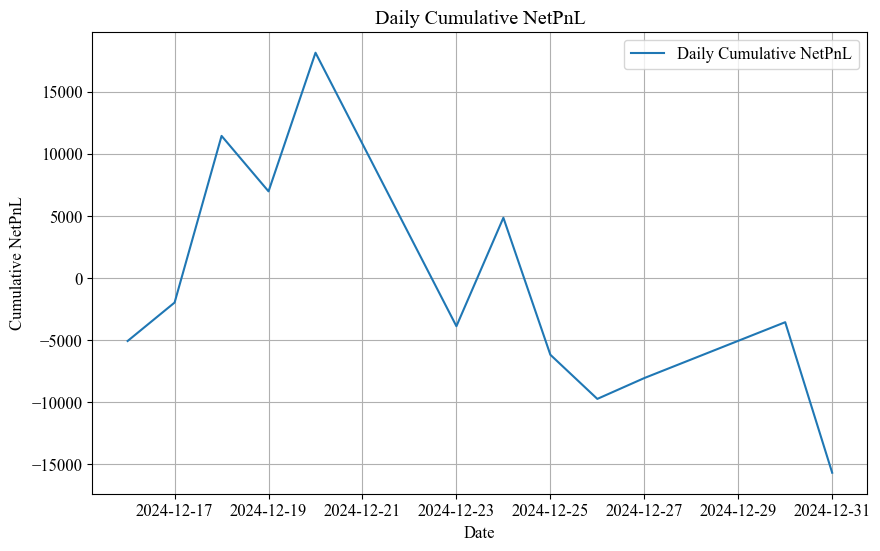

Annualized Return: -16.45%
Annualized Volatility: 8.25%
Sharpe Ratio: -1.99
Max Drawdown: -1.67%


In [9]:
from src.backtest.generate_trade import generate_trade_records
from src.backtest.analyze import analyze_trade_performance
trade_records_df = generate_trade_records(
    merged_df=merged_df,
    long_threshold=0.0008,
    short_threshold=-0.0008,
    fee_rate=1e-4,
    risk_control=True,
    account=2_000_000,
    position_ratio=0.1,
    holding_minutes=5,
    confirm_times=1  # 新增参数：连续信号确认次数
)

print(trade_records_df.head())



daily_df = analyze_trade_performance(trade_records_df, account=2_000_000)
